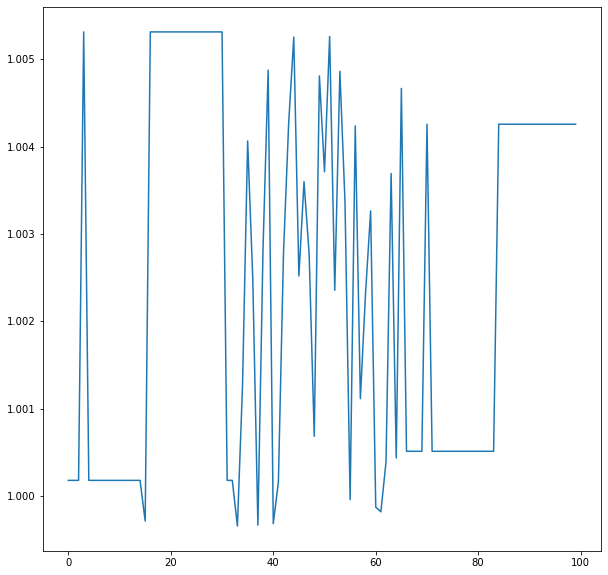

1.0053160002584656
1.0005098746651397


In [248]:
import numpy as np
import cmath
import math
import time
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline  


m = 100
nu = 0.5#0.8
c0 = 1
c1 = 3
s = 1/3
m1 = math.trunc(m*s)
m2 = math.trunc(m*(1-s))
u1=-1 
u2=1

epsilon = 0.0802
delta=0.01

camp, gamma = cmath.polar(complex(1,c1))


mu = np.ones(m)
mu[:m1] = u1
mu[m2:] = u2 
for idx in range(m1, m2):
#    mu[idx] = 0.001*math.exp(-(idx/m -0.5)*(idx/m -0.5)/ 1.0)
    mu[idx] = ((u1-u2)*idx/m+s*u2-(1-s)*u1)/(2*s-1)# + 5.0*(math.exp(-(idx/m -0.5)*(idx/m -0.5)/ 1.0)-math.exp(-(s-0.5)*(s-0.5)/ 1.0))

    

    
coef1 = 1. - nu/m 
coef2 = nu/m * camp
coef3 = c0 + nu/m * c1


def chain(t,V):
    rho = V[:m]
    phi = V[m:]
    sum1 = np.sum(rho*rho*np.cos(2*phi))
    sum2 = np.sum(rho*rho*np.sin(2*phi))
    arg = -2. * phi + gamma
    carg = np.cos(arg)
    sarg = np.sin(arg)
    frho = rho - coef1 * rho*rho*rho - coef2 * rho * (sum1 * carg - sum2 * sarg )
    #np.power(rho,3)
    fphi = epsilon*mu + coef3 * rho * rho - coef2 * (sum1 * sarg  + sum2 * carg )    
    return np.concatenate((frho, fphi))
    
    
rhostart = np.zeros(m, dtype=np.float64)
phistart = np.zeros(m, dtype=np.float64)


rhostart[:m//2] = 0.2 
rhostart[m//2:] = 0.2 #0.2

for idx in range(1, m): 
    rhostart[idx] = 0.2*(1+delta*idx/(idx+1)) #np.sin(idx))   #

phistart[:m//2] = 0.0 
phistart[m//2:] = 0.0 #0.2


start = time.time()
initval = np.concatenate((rhostart,phistart))
skip = 1000_000
sol = solve_ivp(chain, [0, skip], initval, t_eval=[0,skip])
#print (sol.y.shape)
initval = sol.y[:,-1]

compute = 100_000
sol = solve_ivp(chain, [0, compute], initval, t_eval=np.linspace(0, compute, 20*compute))
end = time.time()

#print(end - start)

rhores = sol.y[:m,-1]
phires = sol.y[m:,-1]
phi0 = phires[0]
phires1 = phires[1:] - phi0
phires2 = phires[1:] - phires[:-1]


plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(rhores)
plt.savefig('rho_res.pdf')
plt.show()


print(rhores[m1-10])
print(rhores[m2+10])
#print(m1)
#print(m2)

#print(coef1)
#print(coef2)
#print(coef3)
#print(camp)
#print(gamma)


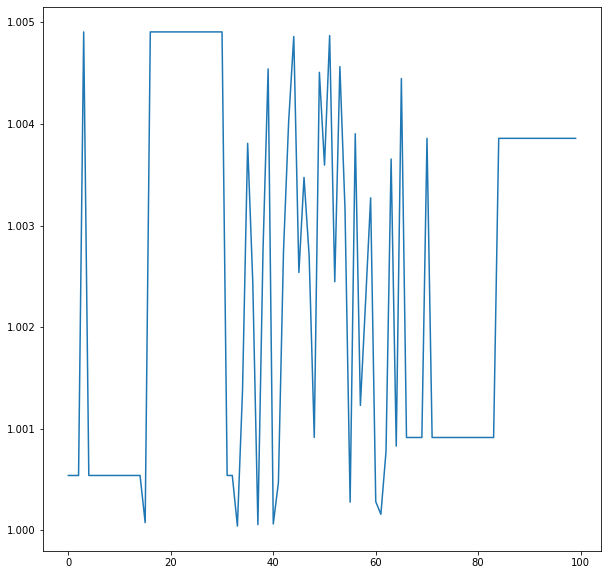

In [249]:
rhores = sol.y[:m,-5]
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(rhores)
plt.savefig('rho_res.pdf')
plt.savefig('rho_res.eps')
plt.show()

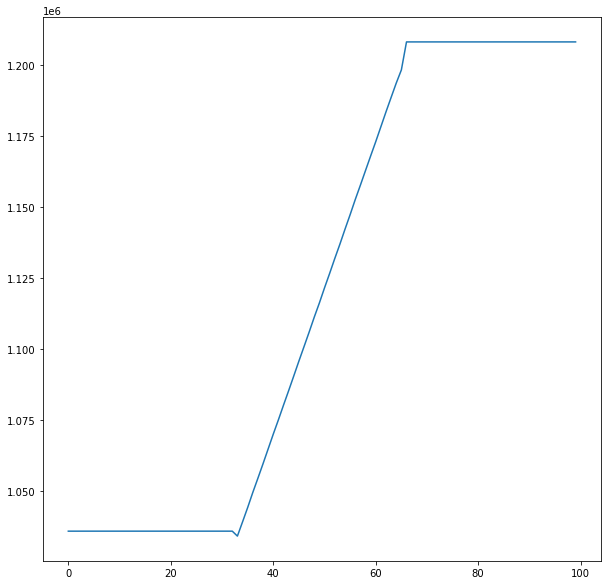

In [250]:
plt.plot(sol.y[m:,-1])
plt.show()

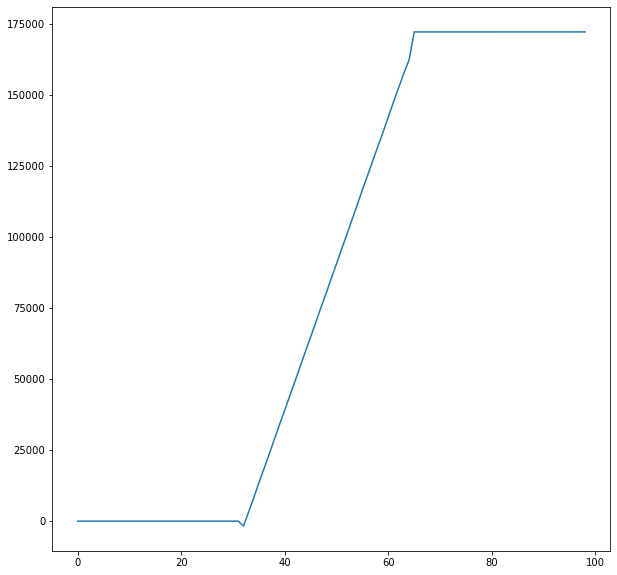

In [251]:
plt.plot(phires1)
plt.show()

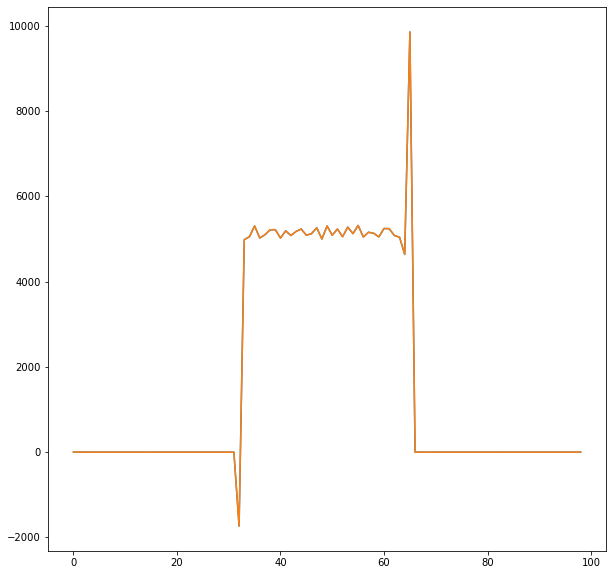

In [252]:
plt.plot(phires2)
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(phires2)
plt.savefig('phi_res.pdf')
plt.savefig('phi_res.eps')
plt.show()


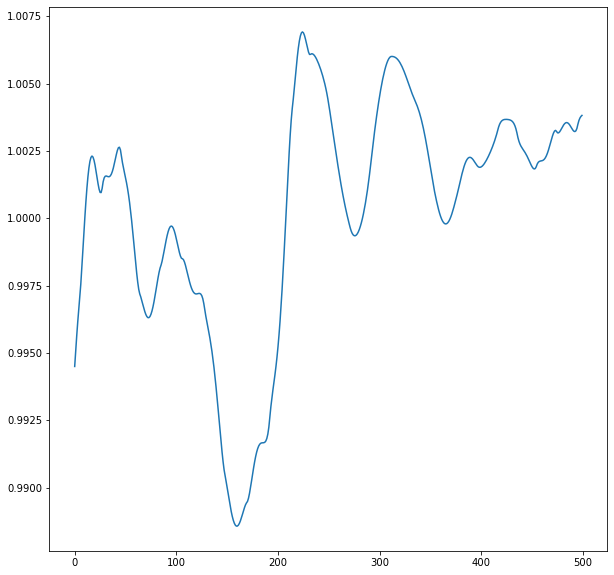

In [253]:
trajectory = sol.y[m-5,compute-500:compute]
plt.plot(trajectory)
plt.show()

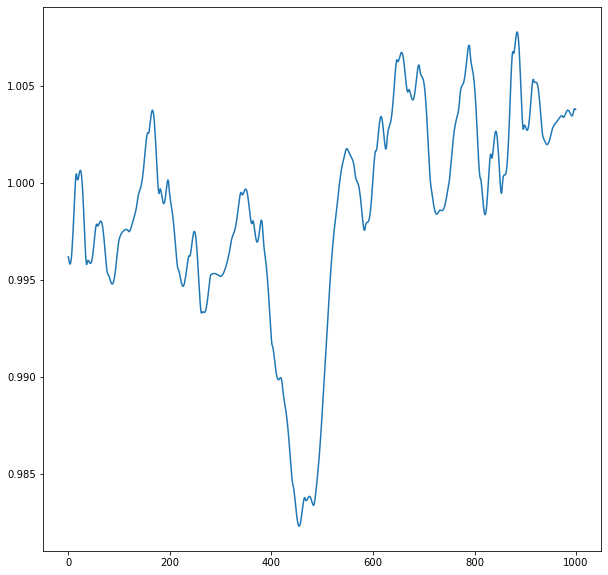

In [260]:
trajectory = sol.y[45,compute-1000:compute]
plt.plot(trajectory)
plt.savefig('trajectory.pdf')
plt.savefig('trajectory.eps')
plt.show()